In [1]:
import pandas as pd
from code.data_module import PlainCrowdTangleDataModule
from code.model import BiLSTMModel
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
%load_ext tensorboard

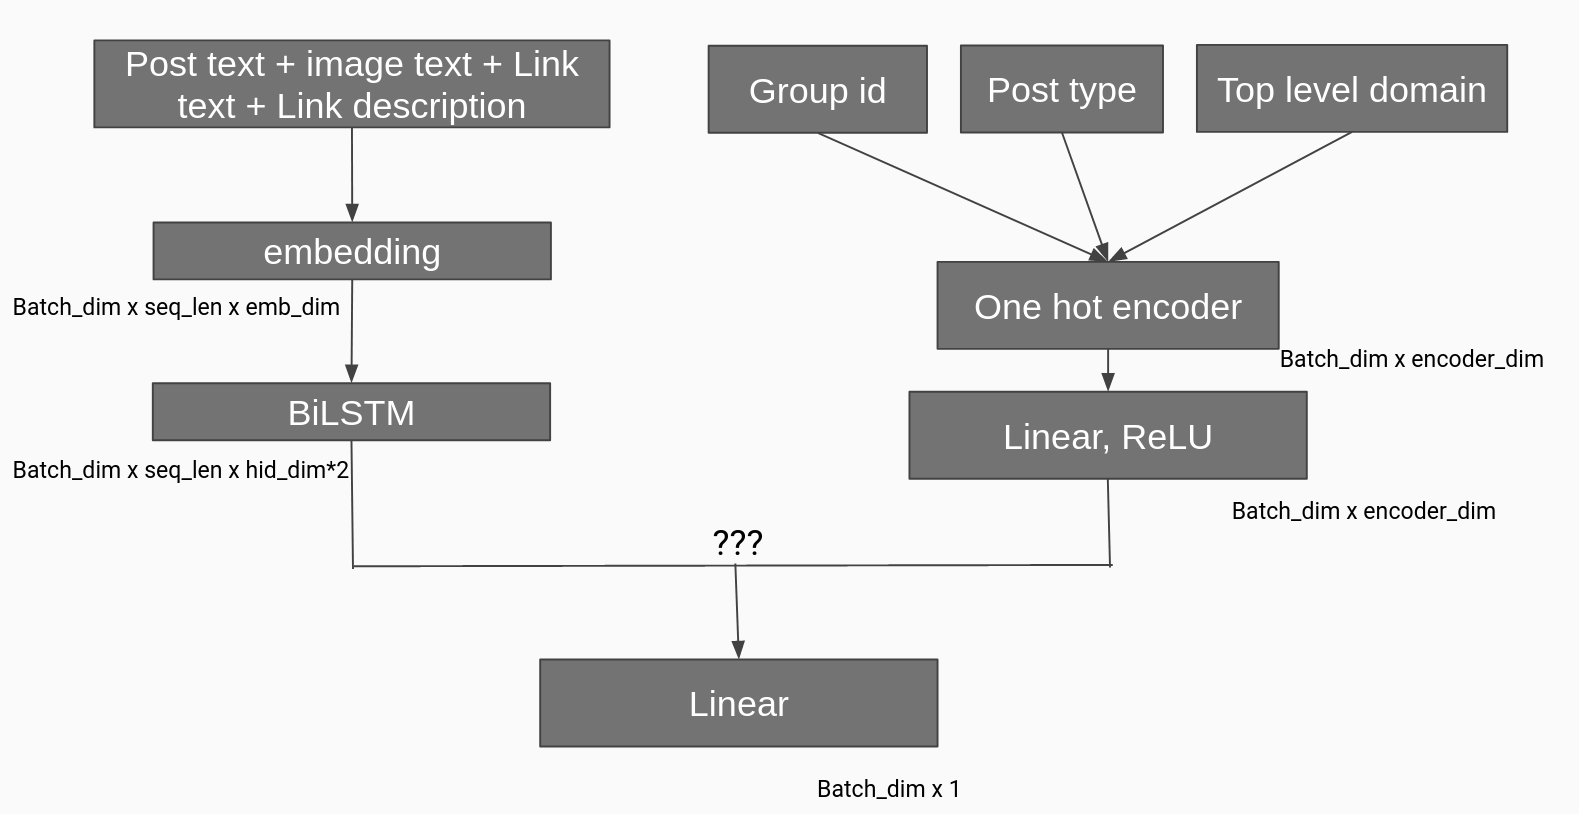

In [2]:
# Start tensorboard
! pkill tensorboard
! rm -r /tmp/.tensorboard-info
%tensorboard --logdir lightning_logs --bind_all

In [3]:
config = {
    'batch_size': 32,
    'dataset_path': '../data/crowdtangle_rtnews_v1_filtered.csv',
    'learning_rate': 1e-5,
    'category_group_id': False
}

# Read dataset + labels

In [4]:
data_module = PlainCrowdTangleDataModule(config=config)
data_module.setup('')
# vocab for decoding sentences
vocab = data_module.vocab
config['vocab_size'] = len(vocab)
len(vocab)

12149

In [5]:
category_vector_length = len(data_module.class_encoder.get_feature_names())
config['category_encoded_length'] = category_vector_length
config['category_encoder_out'] = category_vector_length
model = BiLSTMModel(config)
trainer = pl.Trainer(gpus=1,
                     log_every_n_steps=1,
                     flush_logs_every_n_steps=1,
                    callbacks=[EarlyStopping(monitor='val_loss')]) #, max_epochs=10, overfit_batches=10)
trainer.fit(model, data_module)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores

  | Name             | Type             | Params
------------------------------------------------------
0 | train_metric     | MeanSquaredError | 0     
1 | val_metric       | MeanSquaredError | 0     
2 | embedding        | Embedding        | 1.2 M 
3 | category_encoder | Sequential       | 272   
4 | bilstm           | LSTM             | 302 K 
5 | classifier       | Linear           | 317   
------------------------------------------------------
1.5 M     Trainable params
0         Non-trainable params
1.5 M     Total params
6.072     Total estimated model params size (MB)


Validation sanity check: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.cuda.FloatTensor instead (while checking arguments for embedding)

In [ ]:
import tldextract
extract = tldextract.TLDExtract()
r = extract('https://www.facebook.com/photo.php?fbid=206560174220361&set=p.206560174220361&type=3')
r

In [ ]:
r.domain

In [ ]:
y_lst, encoded_texts_lst, category_vectors_lst = next(iter(data_module.train_dataloader()))


In [ ]:
len(data_module.class_encoder.categories_[2])